In [1]:
import os
import pathlib
import pandas as pd
import ast

print(f"Current directory: {os.getcwd()}")
path_dataset = pathlib.Path("../dataset/")

Current directory: /Users/longyyu/Documents/research/recipevis.git/src


In [2]:
def download_resource(resource_url, local_path):
    import requests
    if not os.path.exists(local_path):
        r = requests.get(resource_url)
        print(f"Content type: {r.headers.get('content-type')}")
        print(f"Content disposition: {r.headers.get('content-disposition')}")
        print(f"Content length: {r.headers.get('content-length')}")
        try:
            with open(local_path, 'wb') as file_disk:
                for chunk in r.iter_content(chunk_size=1024):
                    if chunk:
                        file_disk.write(chunk)
        except Exception as e:
            print(f"Error: {str(e)}")
        if os.path.isfile(local_path):
            print("Downloaded successfully!")
    else:
        print(f"Resource {local_path} already exists.")

## [Kaggle: foodRecSys-V1](https://www.kaggle.com/elisaxxygao/foodrecsysv1)

### Original dataset

* Data were crawled from allrecipes.com
* Crawled 52,821 recipes from allrecipes.com, posted between 2000 and 2018, covering 27 categories
    - Excluded recipes that do not have images and that contain repeated ingredients and zero reviews
* Attributes: ingredients, image and the corresponding ratings from users
* raw_data: 49,698 recipes with 38,131 ingredients and 3,794,003 interactions

### Pre-processing

* Download [raw-data_recipe.csv.zip](https://www.kaggle.com/elisaxxygao/foodrecsysv1?select=raw-data_recipe.csv)
* Delete two columns: nutritions and reviews, which shrinks the file from 1.77GB to 41.7MB.
```python
import pandas as pd
import ast
df = pd.read_csv(path_dataset/"foodRecSys_raw-data_recipe.csv.zip").drop(columns=['image_url', 'nutritions', 'reviews'])
df['cooking_directions'] = [ast.literal_eval(item)['directions'].split("\n") for item in df.cooking_directions]
df.to_csv(path_dataset/"foodRecSys.csv")
```

In [3]:
filename_dataset = "foodRecSys.csv"
df = pd.read_csv(path_dataset/filename_dataset).drop(columns=["Unnamed: 0"])
print("Shape: ", df.shape)
df.head()
# convert cooking directions from strings to lists
# [ast.literal_eval(item) for item in df.cooking_directions]

Shape:  (49698, 6)


,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions
0,222388,Homemade Bacon,5.000000,3,pork belly^smoked paprika^kosher salt^ground b...,"['Prep', '5 m', 'Cook', '2 h 45 m', 'Ready In'..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,29,sauerkraut drained^Granny Smith apples sliced^...,"['Prep', '15 m', 'Cook', '2 h 30 m', 'Ready In..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,12,chicken wings^sprigs rosemary^head garlic^oliv...,"['Prep', '20 m', 'Cook', '40 m', 'Ready In', '..."
3,87211,Chicken Pesto Paninis,4.625000,163,focaccia bread quartered^prepared basil pesto^...,"['Prep', '15 m', 'Cook', '5 m', 'Ready In', '2..."
4,245714,Potato Bacon Pizza,4.500000,2,red potatoes^strips bacon^Sauce:^heavy whippin...,"['Prep', '20 m', 'Cook', '45 m', 'Ready In', '..."


In [9]:
import json
print(df.ingredients[0])
print(json.dumps(ast.literal_eval(df.cooking_directions[0]), indent=2))

pork belly^smoked paprika^kosher salt^ground black pepper
[
  "Prep",
  "5 m",
  "Cook",
  "2 h 45 m",
  "Ready In",
  "11 h 50 m",
  "Preheat oven to 200 degrees F (95 degrees C).",
  "Season pork belly with paprika, salt, and pepper. Tightly wrap pork twice in heavy-duty aluminum foil. Place on a baking sheet and bake in the preheated oven for 2 1/2 hours. Turn off the oven; let pork rest in the oven for 1 hour. Remove meat from oven, leaving it wrapped in aluminum foil, and refrigerate at least 8 hours or overnight.",
  "Remove pork from foil and slice across the grain in 1/4-inch thick slices. Working in batches, cook pork in a non-stick skillet over medium heat until golden and crisped, 6 to 8 minutes per slice."
]


## RecipeNLG

* Source: [github](https://github.com/Glorf/recipenlg) | [dataset](https://recipenlg.cs.put.poznan.pl)
* 2.23M(2,231,142) recipes, out of which 0.59M were from Recipe1M and the rest were gathered by this project team

In [3]:
import ast
import pandas as pd
from zipfile import ZipFile
with ZipFile(path_dataset/"recipenlg-dataset.zip") as z:
    with z.open("dataset/full_dataset.csv") as f:
        df = pd.read_csv(f).drop(columns=['Unnamed: 0'])
df.ingredients = [ast.literal_eval(item.lower()) for item in df.ingredients]
df.NER = [ast.literal_eval(item.lower()) for item in df.NER]
df.NER = [list(set(item)) for item in df.NER] # list(set(...)) ensure NER lists are non-repetitive

# ast.literal_eval(df.directions[0])
# df_recipes1M = df.loc[df.source == "Recipes1M"].reset_index(drop=True)
# df_gathered = df.loc[df.source == "Gathered"].reset_index(drop=True)

In [4]:
print("Shape: ", df.shape)
df.head()

Shape:  (2231142, 6)


,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[bite size shredded rice biscuits, milk, vanil..."
1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[sour cream, cream of mushroom soup, chicken b..."
2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, pepper, salt, butter, cream chee..."
3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[shredded cheese, chicken gravy, cream of mush..."
4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[chocolate chips, graham cracker crumbs, butte..."


In [5]:
len(df.link.unique())

2231142

### Source of recipes

* Recipes from different websites might have different styles and call for different data cleaning steps.

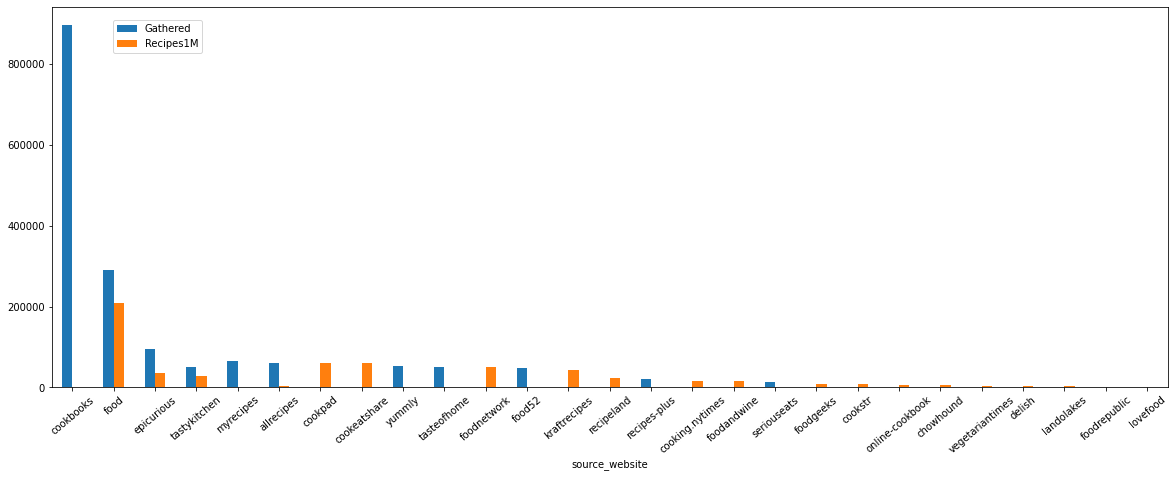

In [10]:
df["source_website"] = [item.split(".com")[0].replace("www.", "") for item in df.link]
freq_table = df.pivot_table(columns="source", index="source_website", values="title", aggfunc="count", fill_value=0)
freq_table = freq_table.assign(rsum = freq_table.sum(axis=1)).reset_index()\
    .sort_values(by = "rsum", ascending=False).drop(columns="rsum")

import matplotlib.pyplot as plt
freq_table.set_index("source_website").plot.bar(rot=40, figsize=[20,7])
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.98))
plt.rc('axes', labelsize=20)
plt.show()

In [13]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
for src in ["Gathered", "Recipes1M"]:
  fig.add_trace(go.Bar(
      x=freq_table["source_website"],
      y=freq_table[src],
      name=src
  ))
fig.update_layout(
    bargap=0.2,
    #barmode='stack',
    width=900,
    height=400
)
fig.update_traces(opacity=0.75)
fig.show()

### Chocolate chip cookie recipes

There are 75,979 cookie recipes in this dataset, out of which 7720 are chocolate chip cookies.

```python
df.title.str.lower().str.contains("cookie").sum()
```

In [14]:
import json
with open("ingredient_mapper.json", "r") as f:
    ingredient_mapper = json.load(f)

fn_dataset = path_dataset/"recipenlg-cookies_ori_format.csv"
if os.path.exists(fn_dataset):
    df_cookies = pd.read_csv(fn_dataset)
    df_cookies.ingredients = [ast.literal_eval(item.lower()) for item in df_cookies.ingredients]
    df_cookies.NER = [ast.literal_eval(item.lower()) for item in df_cookies.NER]
    df_cookies.NER = [list(set(item)) for item in df_cookies.NER] # list(set(...)) ensure NER lists are non-repetitive
else:
    patterns = ["cookie", "chocolate chip"]
    df_cookies = df.loc[df.title.str.lower().apply(lambda item: all(pattern in item for pattern in patterns))].reset_index(drop=True)
    df_cookies.to_csv(fn_dataset, index=False)

print("Shape: ", df_cookies.shape)
df_cookies[["title", "ingredients", "NER", "directions"]].head()

Shape:  (7720, 7)


,title,ingredients,NER,directions
0,Chicago Crunchy Chocolate Chip Cookies,"[3 1/2 c. flour, 3 tsp. baking soda, 1 c. pack...","[chocolate, milk, vanilla, oats, brown sugar, ...","[""Sift flour, baking soda and salt onto wax pa..."
1,Oatmeal Chocolate Chip Cookies,"[1 c. butter flavored shortening, 1 1/4 c. bro...","[milk, vanilla, brown sugar, chocolate chips, ...","[""Beat margarine and sugar until creamy."", ""Ad..."
2,Chocolate Chip Cookies,"[1 1/2 c. salad oil, 1 c. sugar, 2 c. brown su...","[vanilla, brown sugar, chocolate chips, flour,...","[""Blend together the salad oil, sugar, brown s..."
3,The Best Chocolate Chip Cookies,"[1/2 lb. real butter, 1 c. brown sugar, 1 c. w...","[vanilla, brown sugar, chocolate chips, flour,...","[""Beat butter, sugars, vanilla and eggs until ..."
4,White Chocolate Chip Cookies,"[2 1/4 c. flour, sifted, 1 tsp. baking soda, 1...","[nuts, unsalted butter, brown sugar, white cho...","[""Preheat oven to 350\u00b0."", ""Combine flour,..."


#### Data issues

* Mixed units: `1 (12 oz.) pkg.`
* Some ingredients cannot be converted to "cup", e.g. `1/2 stick butter or margarine, softened` / `3 medium apples, chopped` / `dash of salt` / `1 stick oleo` / `2 pkg. instant pudding`
    - It is possible to find conversion rules: `3/4 of an average sliced or cubed apple equates to a single cup`, or `one egg equals 0.2 cup`.
    - Or leave out such ingredients?
* Some messed up values, such as 'T' or '¼', can be found in the NER column, e.g. `df.iloc[1272077].NER`
* Some ingredients were misinterpreted - "butter flavored shortening" was mapped to "butter" in NER
* Some ingredients were not found in the NER list, see below:

In [85]:
row = df_cookies.iloc[16]

print("{:30}    {:20}".format("***Ingredient***", "***NER Ingredient***"))
for ingd in row.ingredients:
    ner_set = [item for item in row.NER if item in ingd]
    print("{:30} -> {:20}".format(ingd, "^".join(ner_set) if ner_set else "?????"))

***Ingredient***                  ***Net Ingredient***
1 c. butter                    -> butter              
1 c. sugar                     -> sugar               
1 c. brown sugar               -> brown sugar^sugar   
2 eggs                         -> eggs                
1 tsp. vanilla flavoring       -> vanilla flavoring   
2 c. flour                     -> flour               
2 1/2 c. oatmeal (processed in blender) -> ?????               
1/2 tsp. salt                  -> salt                
1 tsp. baking powder           -> baking powder       
1 tsp. baking soda             -> baking soda         
12 oz. real chocolate chips    -> chocolate chips     
4 oz. hershey bar, grated      -> ?????               
1 1/2 c. chopped nuts          -> nuts                


**Manually cleaned these 50 chocolate chips cookies recipes:**

* Only looked at the top 20 ingredients in terms of occurrences in chocolate chips cookies recipes
    - Ended up with 18 ingredients because combined `nuts`, `walnuts` and `pecans`
    - ingredient list: 
        - white sugar, brown sugar, flour, egg, vanilla, chocolate chips, salt, baking soda, butter, baking powder, nuts, shortening, margarine, milk, water, oats, cinnamon, peanut butter
* All 50 recipes happened to come from `cookbooks.com`
* For unit conversion rules and data cleaning notes, see [spreadsheet](https://docs.google.com/spreadsheets/d/1N9ZzqTbR8KOHMXoq96fxTpbfXhRjRWhubdVbNmoelrg/edit?usp=sharing)

In [19]:
nrow_to_export = 50
df_cookies.NER = [list(set([ingredient_mapper.get(item, item) for item in ner])) for ner in df_cookies.NER]
df_before = pd.DataFrame()
error_idx = []
for idx, row in df_cookies.iloc[:nrow_to_export].iterrows():
    try:
        df_before = pd.concat(
            [df_before, pd.DataFrame([
                [row.title, row.ingredients, row.link] + ["^".join([item for item in row.ingredients if ner in item]) for ner in row.NER]
            ], columns=["title", "ingredients", "link"] + row.NER)],
            ignore_index=True
        )
    except:
        error_idx.append(idx)
print(df_before.shape)
print(error_idx)
# export to disk as csv file
# top20_list = [
#     "brown sugar", "white sugar", "egg", "flour", "vanilla", "chocolate chips", "baking soda", "salt", "butter", "baking powder", "nuts",
#     "shortening", "margarine", "milk", "walnuts", "water", "pecans", "oats", "cinnamon", "peanut butter"
# ]
# df_before[["title", "ingredients", "link"] + top20_list]\
#     .to_csv(path_dataset/"recipenlg-cookies_to_clean.csv", index=False)

(50, 60)
[]


In [75]:
# read in the cleaned data
df_after = pd.read_csv(path_dataset/"recipenlg-cookies_cleaned.csv")
col_ingd_cup = [col for col in df_after.columns if "(c.)" in col]
df_after = df_after[df_after.to_drop == 0].reset_index(drop=True)[["title", "ingredients", "link"] + col_ingd_cup]
df_after["chocolate chips (c.)"] = df_after["chocolate chips (c.)"].astype("float")
df_after[col_ingd_cup] = df_after[col_ingd_cup].fillna(0)

# convert each row from cup measurements to percentage
df_after_pct = df_after[col_ingd_cup].div(df_after[col_ingd_cup].sum(axis=1), axis=0)
df_after_pct.rename(columns=lambda col: col.replace("(c.)", "(%)"), inplace=True)
col_ingd_pct = df_after_pct.columns
df_after = pd.concat([df_after, df_after_pct], axis=1)
del df_after_pct

Categorize the main ingredients into flour, fats, liquids, toppings, leaveners, and flavorings （reference: [Basic Cookie Ingredients](https://www.craftybaking.com/learn/baked-goods/cookies/ingredients)).

In [4]:
ingd_to_cate = pd.DataFrame(np.array([
    ["white sugar", "sweeteners"],
    ["brown sugar", "sweeteners"],
    ["flour", "flour"],
    ["egg", "eggs"],
    ["vanilla", "flavorings"],
    ["chocolate chips", "toppings"],
    ["salt", "flavorings"],
    ["baking soda", "leaveners"],
    ["butter", "fats"],
    ["baking powder", "leaveners"],
    ["nuts", "toppings"],
    ["shortening", "fats"],
    ["margarine", "fats"],
    ["milk", "liquids"],
    ["water", "liquids"],
    ["oats", "toppings"],
    ["cinnamon", "flavorings"],
    ["peanut butter", "flavorings"]
]), columns=["ingredient", "category"])

ingd_to_cate.sort_values(by="category")[["category", "ingredient"]]

,category,ingredient
3,eggs,egg
8,fats,butter
12,fats,margarine
11,fats,shortening
16,flavorings,cinnamon
6,flavorings,salt
17,flavorings,peanut butter
4,flavorings,vanilla
2,flour,flour
7,leaveners,baking soda


#### An average chocolate chips cookies recipe

In [180]:
import numpy as np
from matplotlib import pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

df_avg = df_after[col_ingd_pct].mean(axis=0).sort_values(ascending=False).reset_index()
df_avg.columns = ["ingredient", "pct"]
df_avg["ingredient"] = [item.replace(" (%)", "") for item in df_avg.ingredient]
df_avg = df_avg.join(ingd_to_cate.set_index("ingredient"), on="ingredient")
df_avg.head()

,ingredient,pct,category
0,flour,0.329321,flour
1,chocolate chips,0.214697,toppings
2,brown sugar,0.107879,sweeteners
3,white sugar,0.091230,sweeteners
4,butter,0.064508,fats


In [178]:
fig = px.sunburst(
    df_avg.assign(pct=df_avg.pct*100),
    path=["category", "ingredient"],
    values="pct",
    color="category",
    color_discrete_sequence=px.colors.qualitative.Antique,
    title="Chocolate chip cookies",
    custom_data=["pct"],
    width=600, height=600
)
fig.update_traces(
    hovertemplate='%{label}<br>pct=%{customdata[0]:5.2f}%<extra></extra>',
    textinfo="percent entry+label"
)
fig.show()

In [181]:
from ipywidgets import interact, Dropdown
dict_cate = dict()
for cate in set(ingd_to_cate.category):
    dict_cate[cate] = ingd_to_cate.ingredient.loc[ingd_to_cate.category == cate].tolist()

cateWidget = Dropdown(options = dict_cate.keys())

@interact(category=cateWidget)
def plot_hist(category=cateWidget):
    fig = go.Figure()
    for ingd in ingd_to_cate.ingredient[ingd_to_cate.category==category]:
        fig.add_trace(go.Histogram(
            x=df_after[f"{ingd} (%)"],
            name=ingd,
            xbins=dict(start=0)
        ))

    fig.update_layout(
        bargap=0.2,
        #barmode='stack',
        width=800,
        height=500,
        showlegend=True
    )
    fig.update_traces(opacity=0.75)
    fig.show()

interactive(children=(Dropdown(description='category', options=('fats', 'toppings', 'flour', 'eggs', 'liquids'…

#### Compute ingredient frequencies and update `ingredient_mapper.json`

In [174]:
import json
from itertools import chain
from collections import defaultdict

with open("ingredient_mapper.json", "r") as f:
    ingredient_mapper = json.load(f)

ingredients = defaultdict(int)
for item in chain.from_iterable(df_cookies.NER):
    item_cleaned = ingredient_mapper.get(item, item)
    ingredients[item_cleaned] += 1

df_ingredients = pd.DataFrame.from_dict(ingredients, orient = "index", columns=["freq"])\
    .sort_values(by="freq", ascending=False).reset_index().rename(columns={'index': 'ingredient'})
df_ingredients["freq_pct"] = [f"{item:6.2f}%"for item in df_ingredients.freq / df_cookies.shape[0] * 100]
df_ingredients.head(25)

,ingredient,freq,freq_pct
0,flour,6862,88.89%
1,egg,6720,87.05%
2,chocolate chips,6382,82.67%
3,vanilla,6297,81.57%
4,baking soda,6122,79.30%
5,brown sugar,6044,78.29%
6,white sugar,5899,76.41%
7,salt,5692,73.73%
8,butter,4758,61.63%
9,baking powder,1590,20.60%


#### Debug

In [328]:
def pprint_ing_ner(row):
    # for pair in zip(ast.literal_eval(row.ingredients), ast.literal_eval(row.NER)):
    #     print(f"{pair[0]:25} -> {pair[1]:20}")
    for ingd in row.ingredients:
        print("{:30} -> {:20}".format(
            ingd, 
            "^".join([item for item in row.NER if item in ingd]))
        )
    print()

row_indices = df_cookies.loc[[any(["vanilla ext" in item for item in row.ingredients]) for _, row in df_cookies.iterrows()]].index
for row in row_indices[:3]:
    pprint_ing_ner(df_cookies.iloc[row])

2 1/4 c. flour, sifted         -> flour               
1 tsp. baking soda             -> baking soda         
1 tsp. salt                    -> salt                
1 c. unsalted butter, softened -> salt^unsalted butter
3/4 c. firmly packed brown sugar -> sugar^brown sugar   
1 1/4 c. golden raisins        -> golden raisins      
3/4 c. granulated sugar        -> sugar               
3 large eggs                   -> eggs                
1 tsp. vanilla extract         -> vanilla extract     
12 oz. coarsely chopped white chocolate -> white chocolate     
3/4 c. coarsely chopped, salted Macadamia nuts -> nuts^salt           

2 1/4 c. flour                 -> flour               
1 tsp. baking soda             -> baking soda         
1/2 tsp. salt                  -> salt                
1 c. softened margarine (2 sticks) -> margarine           
3/4 c. sugar                   -> sugar               
3/4 c. packed light brown sugar -> sugar^brown sugar   
1 tsp. vanilla extract         -

## BBC Good Food

* JSON format recipes from this [github repo](https://github.com/mneedham/bbcgoodfood). There is no documentation on the original source of data, but it seems like data come from this [web scraping script](https://github.com/mneedham/bbcgoodfood/blob/master/download_recipes.py). The url list is unknown. 
* See also https://www.bbcgoodfood.com/. 

In [119]:
filename_dataset = "bbcgoodfood.json"
download_resource(
    resource_url="https://github.com/mneedham/bbcgoodfood/raw/master/stream_clean.json",
    local_path=str(path_dataset/filename_dataset)
)
# read in the json file
import json
data = []
with open(path_dataset/filename_dataset, 'r') as f:
    for line in f:
        data.append(json.loads(line))

print(f"Num of recipes: {len(data)}")
print("Keys of an element: ", data[0].keys())


Resource ../dataset/bbcgoodfood.json already exists.


* The data is a list of dictionary objects, and each dictionary has only one key 'page'. 
    * Each 'page' is also a dictionary, with keys ['article', 'recipe', 'channel', 'title'].
        * Channel is just 'Recipe'.  
        * Article is again a dictionary, with keys ['author', 'description', 'id', 'tags']. 
        * Recipe, another dictionary, has keys ['collections', 'cooking_time', 'prep_time', 'serves', 'keywords', 'ratings', 'nutrition_info', 'ingredients', 'courses', 'cusine', 'diet_types', 'skill_level', 'post_dates']. 
            - Collections: tags such as `Bakewell tart, 200-400 calorie, Easy Christmas, Eat like an athlete, Thai, Blackberry, Summer soup, Autumn cake, Sponge cake, Omelette, Salmon, Chickpea, Microwave pudding, Prosecco, Low in salt, Christmas Day drinks, Healthy pie, Easy cocktail`. 
            - Keywords: key ingredients and tags such as `Stewing steak, Bucks fizz, Vegetarian bbq, Devilled mushrooms, Packed lunch, chickpea side dish, oat and fruit bars, Vanilla sponge, Smart supper, Summer fruit, healthy gravy, Merrilees Parker, Chilled pudding, Gordon ramsay recipes`. 
            - Cusine (45): `French, Scottish, Thai, Greek, African, Cuban, Middle Eastern, Italian, Cajun & Creole, Eastern European, Australian, English, Asian, Swiss, Caribbean, Japanese, Korean, American, Chinese, Latin American, Brazilian, Turkish, Irish, Belgian, Indonesian, British, Indian, Scandinavian, Balinese, Spanish, German, Mediterranean, Danish, Tunisian, Moroccan, Mexican, Swedish, Portuguese, Austrian, Chilean, Jewish, North African, Southern & Soul, Vietnamese, Hungarian`. 
            - Courses (22): `Starter, Supper, Cheese Course, Canapes, Condiment, Side dish, Main course, Afternoon tea, Soup course, Vegetable course, Fish Course, Lunch, Buffet, Breakfast, Cocktails, Snack, Dinner, Brunch, Drink, Dessert, Pasta course, Treat`. 

In [211]:
import pandas as pd
cols = ['article_id', 'title', 'ratings', 'serves', 'ingredients', 'cusine', 'courses']
data_df = pd.DataFrame(columns=cols)
for item in data:
    page = item['page']
    recipe = page['recipe']
    data_df = data_df.append(
        pd.DataFrame(
            data=[[page['article']['id'], page['title'], recipe['ratings'], recipe['serves'], recipe['ingredients'], recipe['cusine'], recipe['courses']]],
            columns=cols
        )
    )
data_df = data_df.reset_index(drop=True)

### A closer look at the pizza recipes

#### Filtering pizza recipes

I first filtered the recipes with "pizza" in their titles, which yields 118 results. Then I manually examined the recipe titles to drop non-pizza recipes and label as much pizza subcategories as I can: 
* Non-pizza: 'Steak with pizzaiola sauce', '5 easy pizza toppings', ['Pizza omelette'](https://www.bbcgoodfood.com/recipes/pizza-omelette), ['Baked cauliflower pizzaiola'](https://www.bbcgoodfood.com/recipes/baked-cauliflower-pizzaiola), ['Pizza baked potato'](https://www.bbcgoodfood.com/recipes/pizza-baked-potato), ['Puff pizza tart'](https://www.bbcgoodfood.com/recipes/puff-pizza-tart), ['Mini pizza quiches'](https://www.bbcgoodfood.com/recipes/mini-pizza-quiches), ['Pizzadillas'](https://www.bbcgoodfood.com/recipes/pizzadillas), and ['Pizza pasta salad'](https://www.bbcgoodfood.com/recipes/pizza-pasta-salad)
* Margherita pizza, e.g. 'Next level Margherita pizza', 'Very simple Margherita pizza', 'Ultimate pizza Margherita', 'Pizza Margherita in 4 easy steps', 'Lighter Pizza Margherita'
* Florentine pizza: 'Florentine pizza', '20-minute Fiorentina pizzas', 'Florentine dairy-free pizza', 'Eggs Florentine pizza'
* Deep-pan pizza: 'Cheat's deep-pan pizza'
* Frying pan pizza: 'Frying pan pizza bianco with mushrooms & egg', 'Frying pan pizza with aubergine, ricotta & mint', 'Frying pan pizza', 'Frying pan pizza pie'
* Others: 'Mini top-your-own pizzas', 'Pesto pizza with artichokes & prosciutto'

In this process, I also identified some potential outliers: ['Cookie dough pizza'](https://www.bbcgoodfood.com/recipes/cookie-dough-pizza), ['Cauliflower crust pizza'](https://www.bbcgoodfood.com/recipes/cauliflower-crust-pizza), ['Tuna melt pizza baguettes'](https://www.bbcgoodfood.com/recipes/tuna-melt-pizza-baguettes).

In [409]:
df_pizza = data_df[data_df.title.str.lower().str.contains("pizza")].reset_index(drop = True)
print(f"Before: {df_pizza.shape[0]}")

# drop the non-pizza recipes
list_nonpizza = ['Steak with pizzaiola sauce', '5 easy pizza toppings', 'Pizza omelette', 'Baked cauliflower pizzaiola', 'Pizza baked potato', 'Puff pizza tart', 'Mini pizza quiches', 'Pizzadillas', 'Pizza pasta salad']
df_pizza = df_pizza[~df_pizza.title.isin(list_nonpizza)].reset_index(drop = True)

# label the rest
df_pizza["category"] = None
df_pizza.loc[df_pizza.title.str.contains("Margherita"), "category"] = "Margherita"
df_pizza.loc[df_pizza.title.str.contains("Florentine|Florentina|Fiorentina", regex=True), "category"] = "Florentine"
df_pizza.loc[df_pizza.title.str.contains("Frying pan"), "category"] = "Frying-pan"
df_pizza.loc[df_pizza.title.str.contains("deep-pan"), "category"] = "Deep-pan"

print(f"After: {df_pizza.shape[0]}")
print(df_pizza.groupby("category")["category"].count())

df_pizza.head()

Before: 118
After: 109
category
Deep-pan      1
Florentine    4
Frying-pan    4
Margherita    5
Name: category, dtype: int64


,article_id,title,ratings,serves,ingredients,cusine,courses,category
0,102136,Pizza puff pinwheels,92,12,"[puff pastry, pasta, ham, cheddar, egg, oregano]",Italian,"[Treat, Starter, Snack, Afternoon tea]",None
1,4278386,Smoking chilli chicken & sweetcorn pizza,100,4,"[barbecue sauce, chipotle paste, pizza base, m...",,[Main course],None
2,7829316,Next level Margherita pizza,100,0,"[strong white flour, fast-action dried yeast, ...",,"[Dinner, Lunch, Main course]",Margherita
3,96966,Very simple Margherita pizza,98,2,"[olive oil, plain flour, yeast, sugar, water, ...",Italian,"[Dinner, Main course]",Margherita
4,3410721,Holiday pizzas,93,0,"[bread flour, sugar, fast-action dried yeast, ...",Italian,[Main course],None


The original recipe with article_id [4278386](https://www.bbcgoodfood.com/recipes/smoking-chilli-chicken-sweetcorn-pizza):

* 100g barbecue sauce
* 1-2 tbsp chipotle paste , or more if you like it spicy
* 2 large ready-made pizza bases
* 175g mozzarella , grated (ready-grated is fine)
* 200g can sweetcorn , drained
* 300g jar red pepper , drained and torn into slices
* 200g cooked sliced chicken
* small pack coriander , leaves only
* 2 fat green chillies , sliced, seeds removed (optional)

#### Ingredient list cleanup

This dataset already comes with pre-processed ingredient lists with the measuring units and most of the descriptive terms removed. But there is still room for further clean-up, e.g., 'strong white flour' -> 'flour'. I manually created a set of mapping rules to aggregate ingredients (see `src/ingredient_mapper.json`), reducing the number of unique ingredients from 270 to 194.  

**Question**
* Granularity
    - Should we treat "pizza base" and "pizza base mix" as the same? What about "pizza base mix" and "bread mix"?
    - Brown sugar and regular sugar? Balsamic vinegar and red wine vinegar?
    - 'olive oil' -> 'oil'? 'tomato sauce' -> 'tomato'?
* How to automatically generate these mapping rules?

In [643]:
with open("ingredient_mapper.json", "r") as f:
    ingredient_mapper = json.load(f)
# print(json.dumps(ingredient_mapper, indent=4))

from itertools import chain
from collections import defaultdict
print("Num of unique ingredients (before cleaning): ", len(set(chain.from_iterable(df_pizza["ingredients"]))))

# further clean up the ingredients
df_pizza["ingredients_cleaned"] = [
    list(set([ingredient_mapper.get(item, item) for item in ing_list])) \
        for ing_list in df_pizza["ingredients"]
]
# row-to-row comparison
for i in range(5):
    print(f">>> {','.join(df_pizza.ingredients[i])}\n<<< {','.join(df_pizza.ingredients_cleaned[i])}\n")

# compute frequency table
ingredients = defaultdict(int)
for item in chain.from_iterable(df_pizza["ingredients_cleaned"]):
    ingredients[item] += 1

df_ingredients = pd.DataFrame.from_dict(ingredients, orient = "index", columns=["freq"])\
    .sort_values(by="freq", ascending=False).reset_index().rename(columns={'index': 'ingredient'})

print(f"Num of unique ingredients (after cleaning): {len(df_ingredients)}")
df_ingredients.head(10)

# df_ingredients[df_ingredients['ingredient'].str.contains('potato')].ingredient.tolist()

Num of unique ingredients (before cleaning):  270
>>> puff pastry,pasta,ham,cheddar,egg,oregano
<<< cheddar,pasta,ham,oregano,egg,puff pastry

>>> barbecue sauce,chipotle paste,pizza base,mozzarella,sweetcorn,red pepper,chicken,coriander,green chilli
<<< mozzarella,sweetcorn,chicken,barbecue sauce,red pepper,pizza base,chipotle paste,coriander,chilli

>>> strong white flour,fast-action dried yeast,plum tomatoes,extra virgin olive oil,oregano,basil,parmesan,mozzarella
<<< oil,mozzarella,parmesan,flour,basil,tomato,oregano,yeast

>>> olive oil,plain flour,yeast,sugar,water,passata,mozzarella,parmesan,basil,salad
<<< oil,mozzarella,passata,salad,parmesan,flour,sugar,basil,yeast,water

>>> bread flour,sugar,fast-action dried yeast,olive oil,water,garlic clove,passata,tomato purÃ©e,oregano,basil leaf,sugar,red wine vinegar,mozzarella,houmous
<<< oil,mozzarella,garlic clove,passata,houmous,flour,sugar,tomato,basil,red wine vinegar,oregano,yeast,water

Num of unique ingredients (after cleanin

,ingredient,freq
0,oil,75
1,tomato,54
2,flour,51
3,mozzarella,49
4,garlic clove,37
5,yeast,33
6,onion,32
7,basil,29
8,bread,22
9,olive,19


In [485]:
from collections import Counter
from itertools import combinations
# create a dictionary that counts the occurrences of each ingredient pair
combi_count = dict(Counter(
    chain.from_iterable([
        list(combinations(sorted(ing_list), 2)) for ing_list in df_pizza.ingredients_cleaned
    ])
))
sorted(combi_count.items(), key=lambda item: item[1], reverse=True)[:10]

[(('flour', 'oil'), 44),
 (('oil', 'tomato'), 41),
 (('garlic clove', 'oil'), 35),
 (('mozzarella', 'tomato'), 34),
 (('oil', 'yeast'), 33),
 (('flour', 'yeast'), 32),
 (('mozzarella', 'oil'), 32),
 (('flour', 'tomato'), 29),
 (('flour', 'mozzarella'), 25),
 (('flour', 'garlic clove'), 25)]

#### Visualization attempts

##### Bar/Pie Charts

Select several main ingredients to plot proportion?

* Refer to [Baking with machine learning](https://sararobinson.dev/2020/04/30/baking-machine-learning.html) - 12 main ingredients: flour, sugar, starter, salt, yeast, milk, water, oil, eggs, baking powder, baking soda, butter.

Problem is the current dataset **does not have quantity information.**

In [430]:
major_ingredients = ["flour", "sugar", "salt", "yeast", "milk", "water", "oil", "egg", "baking powder", "butter"]

['potato', 'new potato', 'Jersey Royal potato']

##### Network Graphs

In [413]:
import matplotlib.pyplot as plt
import networkx as nx
import nx_altair as nxa

Num of edges:  41
Num of nodes:  16


alt.LayerChart(...)

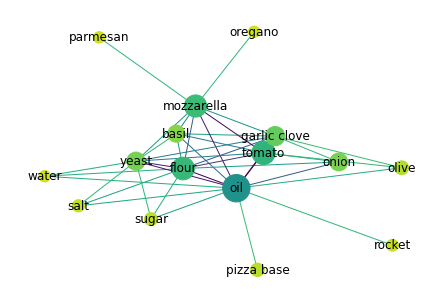

In [645]:
G = nx.Graph()
# G.add_edges_from(combi_count.keys())
G.add_edges_from([item[0] for item in combi_count.items() if item[1] > 10])
print("Num of edges: ", G.number_of_edges())
print("Num of nodes: ", G.number_of_nodes())

for edge in G.edges():
    occurrence = combi_count[edge] if edge in combi_count else combi_count[(edge[1], edge[0])]
    G.edges()[edge].update({
        "edge_weight": occurrence
    })

for node in G.nodes():
    G.nodes()[node].update({
        "label": node,
        "weight": ingredients[node]
    })

# draw the graph using networkx (matplotlib)
weights = [ingredients[node] for node in G.nodes()]
widths = [G.edges()[edge]['edge_weight'] for edge in G.edges()]
nx.draw(
    G, with_labels=True, pos=nx.spring_layout(G, seed=23),
    node_size=np.array(weights)*10, node_color=weights, cmap=plt.cm.viridis_r, vmin=2, vmax=150,
    edge_color=widths, edge_cmap=plt.cm.viridis_r, edge_vmin=0, edge_vmax=35
)

# draw the graph using nx-altair
viz = nxa.draw_networkx(
    G,
    node_label='label',
    node_color='weight', cmap='blues',
    pos=nx.spring_layout(G, seed=23),
    width='edge_weight',
    edge_color="#5D8AA8",
)
viz.interactive()

## Annotated recipes from ["RecipeScape"](https://recipescape.kixlab.org/)

Annotated recipes in JSON format for [chocolate chip cookies](https://recipescape.kixlab.org/ccc_trees.json) and [tomato pasta](https://recipescape.kixlab.org/tomatopasta_trees.json).

In [13]:
# download dataset from url if not already exists
filename_dataset = "recipescape-choco-chip-cookies.json"
download_resource(
    resource_url="https://recipescape.kixlab.org/ccc_trees.json",
    local_path=str(path_dataset/filename_dataset)
)
# read in the json file
import json
with open(path_dataset/filename_dataset, 'r') as f:
    data = json.load(f)
# data is a list of dict objects, each dict has keys 'id' and 'tree'

Resource dataset/recipescape-choco-chip-cookies.json already exists.


This dataset is a list of dict objects, each dict has keys 'id' and 'tree'.

In [42]:
print(f"Num of elements: {len(data)}")
print("Keys of an element: ", data[0].keys())
# print(json.dumps(data, indent=4))

Num of elements: 490
Keys of an element:  dict_keys(['id', 'tree'])


A 'tree' is also a list of dict objects, each with keys 'word' and 'ingredient'. 

In [45]:
tree = data[0]["tree"]
print(f"Num of elements: {len(tree)}")
print("Keys of an element: ", tree[0].keys())
# print(json.dumps(tree, indent=4))

Num of elements: 7
Keys of an element:  dict_keys(['word', 'ingredient'])


In [75]:
# pretty print the data as table (first 6 rows)
def print_row(row):
    print(f"{row[0]:<24}\t{row[1]:<12}\t{row[2]}")

print_row(["recipe_id", "word", "ingredient"])
for recipe in data[:6]:
    for idx, record in enumerate(recipe["tree"]):
        print_row(row=[' ' if idx else recipe['id'], record['word'], ','.join(record['ingredient'])])

recipe_id               	word        	ingredient
54a47bb66529d92b2c02c10e	arrange     	bread slices,work surface,bread slice,cheese,tablespoons caponata,half,tomato
                        	remaining   	cheese,bread,brush,bread slices,oil,heat,skillet,medium heat
                        	is          	cheese
54a42ff76529d92b2c01385a	heat        	cooking spray
                        	add         	tomato sauce,cranberry sauce,horseradish,dry mustard,vinegar,stock
                        	lower       	
                        	stirring    	
                        	lower       	
                        	serve       	
                        	reheat      	
54a4154d19925f464b375841	heat        	oil
                        	sauté       	shallots
                        	add         	chicken
                        	turn        	chicken
                        	broth       	
                        	cover       	
                        	simmer      	chicken
                        	boil     

### Tomato pasta

In [363]:
# download dataset from url if not already exists
filename_dataset = "recipescape-tomato-pasta.json"
download_resource(
    resource_url="https://recipescape.kixlab.org/tomatopasta_trees.json",
    local_path=str(path_dataset/filename_dataset)
)

# read in the json file
import json
with open(path_dataset/filename_dataset, 'r') as f:
    data = json.load(f)
# data is a list of dict objects, each dict has keys 'id' and 'tree'

print(f"Num of elements: {len(data)}")
print("Keys of an element: ", data[0].keys())
# print(json.dumps(data, indent=4))

tree = data[0]["tree"]
print(f"\nNum of elements: {len(tree)}")
print("Keys of an element: ", tree[0].keys())
# print(json.dumps(tree, indent=4))

Resource ../dataset/recipescape-tomato-pasta.json already exists.
Num of elements: 553
Keys of an element:  dict_keys(['id', 'tree'])

Num of elements: 3
Keys of an element:  dict_keys(['word', 'ingredient'])


In [365]:
# pretty print the data as table (first 6 rows)
def print_row(row):
    print(f"{row[0]:<24}\t{row[1]:<12}\t{row[2]}")

print_row(["recipe_id", "word", "ingredient"])
for recipe in data[:6]:
    for idx, record in enumerate(recipe["tree"]):
        print_row(row=[' ' if idx else recipe['id'], record['word'], ','.join(record['ingredient'])])

# pprint_df = pd.DataFrame(
#     columns = ["recipe_id", "word", "ingredient"]
# )
# for recipe in data:
#     for record in recipe["tree"]:
#         pprint_df = pprint_df.append(pd.DataFrame(
#             data=[[recipe["id"], record["word"], record["ingredient"]]],
#             columns=["recipe_id", "word", "ingredient"]
#         ))
# pprint_df.head()

recipe_id               	word        	ingredient
54a47bb66529d92b2c02c10e	arrange     	bread slices,work surface,bread slice,cheese,tablespoons caponata,half,tomato
                        	remaining   	cheese,bread,brush,bread slices,oil,heat,skillet,medium heat
                        	is          	cheese
54a42ff76529d92b2c01385a	heat        	cooking spray
                        	add         	tomato sauce,cranberry sauce,horseradish,dry mustard,vinegar,stock
                        	lower       	
                        	stirring    	
                        	lower       	
                        	serve       	
                        	reheat      	
54a4154d19925f464b375841	heat        	oil
                        	sauté       	shallots
                        	add         	chicken
                        	turn        	chicken
                        	broth       	
                        	cover       	
                        	simmer      	chicken
                        	boil     

## Simplified Recipes1M

> Source: https://dominikschmidt.xyz/simplified-recipes-1M/

In [637]:
# download dataset from url if not already exists
filename_dataset = "simplified-recipes-1M.npz"
download_resource(
    resource_url="https://github.com/schmidtdominik/RecipeNet/raw/master/simplified-recipes-1M.npz",
    local_path=str(path_dataset/filename_dataset)
)

import numpy as np
with np.load(path_dataset/filename_dataset, allow_pickle=True) as data:
    recipes = data['recipes']
    ingredients = data['ingredients']
del data

Resource ../dataset/simplified-recipes-1M.npz already exists.


In [642]:
print(ingredients[:5])
print(recipes[0])
print([", ".join([ingredients[ing] for ing in recipe]) for recipe in recipes[:5]])

['salt' 'pepper' 'butter' 'garlic' 'sugar']
[ 233 2754   42  120  560  345  150 2081   12   21]
['basil leaves, focaccia, leaves, mozzarella, pesto, plum tomatoes, rosemary, sandwiches, sliced, tomatoes', 'balsamic vinegar, boiling water, butter, cooking spray, crumbled gorgonzola, currants, gorgonzola, grated orange, kosher, kosher salt, orange rind, parsley, pine nuts, polenta, toasted, vinegar, water', 'bottle, bouillon, carrots, celery, chicken bouillon, cilantro, clam juice, cloves, fish, garlic, medium shrimp, olive, olive oil, onion, pepper, pepper flakes, red pepper, red pepper flakes, salt, sherry, shrimp, stewed tomatoes, tomatoes, water, white, white wine', 'grand marnier, kahlua', 'black pepper, coarse sea salt, fresh lemon, fresh lemon juice, ground, ground black pepper, lemon, lemon juice, lime, lime peel, mayonaise, pepper, sea salt, shallots, sherry wine, sherry wine vinegar, vinegar, wine vinegar']
